# Антонов Владимир Антонович группа 3530902/00002
# Тема проекта: Физически правдоподобная симуляция управления движением квадрокоптера

## Словесное описание объекта моделирования

### 1.	Структура как механическая система
Квадрокоптер — это летательный аппарат с четырьмя роторами(далее винт, пропеллер), вращающимися диагонально в противоположных направлениях. Основными механическими компонентами являются фюзеляж или рама, четыре винта (с фиксированным шагом или с переменным шагом) и двигатели. Для лучшей производительности и простейших алгоритмов управления двигатели и винты расположены на одинаковом расстоянии. Каждый винт приводится в движение собственным двигателем. Каждый винт создает и подъем, и крутящий момент вокруг своего центра вращения, а также сопротивление, противоположное направлению полета транспортного средства. Квадрокоптеры обычно имеют два винта, вращающихся по часовой стрелке и два против часовой стрелки. Управление полетом обеспечивается независимым изменением скорости и, следовательно, подъемной силы и крутящего момента каждого ротора. Угол наклона и крена регулируются путем изменения чистого центра тяги, а рыскание((1), далее вращение в пространстве) регулируется путем изменения чистого крутящего момента.
### 2.	Механические движения объекта
Квадрокоптер зависает или регулирует свою высоту, прилагая одинаковую тягу ко всем четырем винтам.
Квадрокоптер регулирует свое вращение в пространстве, прикладывая большее усилие к винтам, вращающимся в одном направлении.
Квадрокоптер регулирует свой шаг или крен(далее наклон), прикладывая большую тягу к одному винту (или двум соседним винтам) и меньшую тягу к диаметрально противоположному винту.
Или по-простому:
Ускорить все винты — подъём.
Ускорить винты с одной стороны и замедлить с другой — движение в строну.
Ускорить винты, вращающиеся по часовой стрелке, и замедлить вращающиеся против — поворот.
### 3.	Ограничение
Вроде как ограничений нету, но некоторые квадрокоптеры не могут летать вверх ногами
### 4.	Группа движений, которыми описываются движения составных элементов объекта
Для движения самого коптера и винтов будет использоваться группа кватернионов Q(возможно SU(2)) или(и) группа вращений SO (3)

#### Примечание 
1. Рыскание (вращение) - Yaw (rotation). 
Вращение по рысканью движение вокруг оси рыскания твердого тела, которое меняет направление, на которое оно указывает, влево или вправо от его направления движения. скорость рыскания или скорость рыскания автомобиля, самолета, снаряда или другого твердого тела — это угловая скорость этого вращения или скорость изменения курса. угол, когда дрон находится в горизонтальном положении. Обычно он измеряется в градусах в секунду или радианах в секунду.


### Тестовое задание

In [ ]:
from matplotlib.widgets import Slider, Button, RadioButtons
from IPython.display import display
from mpl_toolkits import mplot3d
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

%matplotlib notebook


#Создали рисунок
fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection='3d')
plt.subplots_adjust(left=0.2, bottom=0.3)
ax.grid(axis = 'both')
axcolor = 'lightgray'

#Вершины куба
cube_matrix = np.array([[-1, -1, -1],
        [-1, -1,  1],[-1, -1, -1],
        [-1,  1, -1],[-1, -1, -1],
        [-1,  1,  1],[-1, -1, -1],
        [ 1, -1, -1],[-1, -1, -1],
        [ 1, -1,  1],[-1, -1, -1],
        [ 1,  1, -1],[-1, -1,  1],
        [-1,  1, -1],[-1, -1,  1],
        [-1,  1, -1],[-1, -1,  1],
        [-1,  1,  1],[-1, -1,  1],
        [-1,  1,  1],[-1, -1,  1],
        [ 1, -1, -1],[-1, -1,  1],
        [ 1, -1,  1],[-1, -1,  1],
        [ 1,  1, -1],[-1, -1,  1],
        [ 1,  1,  1],[-1,  1, -1],
        [-1,  1,  1],[-1,  1, -1],
        [ 1, -1, -1],[-1,  1, -1],
        [ 1, -1,  1],[-1,  1, -1],
        [ 1,  1, -1],[-1,  1, -1],
        [ 1,  1,  1],[-1,  1,  1],
        [ 1, -1, -1],[-1,  1,  1],
        [ 1, -1,  1],[-1,  1,  1],
        [ 1,  1, -1],[-1,  1,  1],
        [ 1,  1,  1],[ 1, -1, -1],
        [ 1, -1,  1],[ 1, -1, -1],
        [ 1,  1, -1],[ 1, -1, -1],
        [ 1,  1,  1],[ 1, -1,  1],
        [ 1,  1, -1],[ 1, -1,  1],
        [ 1,  1,  1],[ 1,  1, -1],
        [ 1,  1,  1]])
#Строим куб
cube = ax.plot3D(cube_matrix[:,0],cube_matrix[:,1],cube_matrix[:,2], color='red')

#Инициализируем переменные
x_movement=0
y_movement=0
z_movement=0

x_rotation=0
y_rotation=0
z_rotation=0

#Создаем слайдеры
x_movement_slider_chart = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)
x_movement_slider = Slider(x_movement_slider_chart, 'X перемещения', -1, 1, valinit=x_movement)

y_movement_slider_chart = plt.axes([0.25, 0.20,0.65, 0.03], facecolor=axcolor)
y_movement_slider = Slider(y_movement_slider_chart, 'Y перемещения', -1, 1, valinit=y_movement)

z_movement_slider_chart = plt.axes([0.25, 0.15,0.65, 0.03], facecolor=axcolor)
z_movement_slider = Slider(z_movement_slider_chart, 'Z перемещения', -1, 1, valinit=z_movement)

x_rotation_slider_chart = plt.axes([0.25, 0.10, 0.65, 0.03], facecolor=axcolor)
x_rotation_slider = Slider(x_rotation_slider_chart, 'X вращения', 0, 360, valinit=x_rotation)

y_rotation_slider_chart = plt.axes([0.25, 0.05,0.65, 0.03], facecolor=axcolor)
y_rotation_slider = Slider(y_rotation_slider_chart, 'Y вращения', 0, 360, valinit=y_rotation)

z_rotation_slider_chart = plt.axes([0.25, 0,0.65, 0.03], facecolor=axcolor)
z_rotation_slider = Slider(z_rotation_slider_chart, 'Z вращения', 0, 360, valinit=z_rotation)

"""
#Генераторы группы S0(3)
Lx = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
Ly = np.array([[0, 0, 1], [0, 0, 0], [-1, 0, 0]])
Lz = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

#Элементы группы поворотов S0(3)
Rx=expm(Lx*x)
Ry=expm(Ly*y)
Rz=expm(Lz*z)
"""
#Элементы группы пооворотов S0(3)
Rx = np.array([[1, 0, 0], [0, np.cos(x_rotation), -np.sin(x_rotation)], [0, np.sin(x_rotation), np.cos(x_rotation)]])
Ry = np.array([[np.cos(y_rotation), 0, np.sin(y_rotation)], [0, 1, 0], [-np.sin(y_rotation), 0, np.cos(y_rotation)]])
Rz = np.array([[np.cos(z_rotation), -np.sin(z_rotation), 0], [np.sin(z_rotation), np.cos(z_rotation), 0], [0, 0, 1]])

#Функция обновления переменной вращения по оси x
#Функции инициализуются отдельно, т.к. умножение элементов группы S0(3) некоммутативно
def x_rotation_update(val):
    global cube_matrix
    x_rotation = np.deg2rad(x_rotation_slider.val)
    x_rotation = np.deg2rad(45)
    Rx = np.array([[1, 0, 0], [0, np.cos(x_rotation), -np.sin(x_rotation)], [0, np.sin(x_rotation), np.cos(x_rotation)]])
    cube_matrix = cube_matrix.dot(Rx)
    cube.set_xdata(cube_matrix[:,0])
    cube.set_ydata(cube_matrix[:,1])
    cube.set_3d_properties(cube_matrix[:,2])
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
#Функция обновления переменной вращения по оси y    
def y_rotation_update(val):
    global cube_matrix
    y_rotation = np.deg2rad(y_rotation_slider.val)
    Ry = np.array([[np.cos(y_rotation), 0, np.sin(y_rotation)], [0, 1, 0], [-np.sin(y_rotation), 0, np.cos(y_rotation)]])
    cube_matrix = cube_matrix.dot(Ry)
    cube.set_data(cube_matrix[:,0],cube_matrix[:,1],cube_matrix[:,2])
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
#Функция обновления переменной вращения по оси z      
def z_rotation_update(val):
    global cube_matrix
    z_rotation = np.deg2rad(z_rotation_slider.val)
    Rz = np.array([[np.cos(z_rotation), -np.sin(z_rotation), 0], [np.sin(z_rotation), np.cos(z_rotation), 0], [0, 0, 1]])
    cube_matrix = cube_matrix.dot(Rz)
    cube.set_data(cube_matrix[:,0],cube_matrix[:,1],cube_matrix[:,2])
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
#применение функций после изменений значения слайдера    
x_rotation_slider.on_changed(x_rotation_update)
y_rotation_slider.on_changed(y_rotation_update)
z_rotation_slider.on_changed(z_rotation_update)

#Отрисовка
plt.show()

### Тестовый пример вращения куба в пространстве

In [ ]:
from matplotlib.widgets import Slider, Button, RadioButtons
from IPython.display import display
from mpl_toolkits import mplot3d
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
%matplotlib notebook

fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection='3d')
plt.subplots_adjust(left=0.2, bottom=0.3)

ax.grid(axis = 'both')
axcolor = 'lightgray'
x_rotation = np.deg2rad(45)
cube_matrix = np.array([[-1, -1, -1],
        [-1, -1,  1],[-1, -1, -1],
        [-1,  1, -1],[-1, -1, -1],
        [-1,  1,  1],[-1, -1, -1],
        [ 1, -1, -1],[-1, -1, -1],
        [ 1, -1,  1],[-1, -1, -1],
        [ 1,  1, -1],[-1, -1,  1],
        [-1,  1, -1],[-1, -1,  1],
        [-1,  1, -1],[-1, -1,  1],
        [-1,  1,  1],[-1, -1,  1],
        [-1,  1,  1],[-1, -1,  1],
        [ 1, -1, -1],[-1, -1,  1],
        [ 1, -1,  1],[-1, -1,  1],
        [ 1,  1, -1],[-1, -1,  1],
        [ 1,  1,  1],[-1,  1, -1],
        [-1,  1,  1],[-1,  1, -1],
        [ 1, -1, -1],[-1,  1, -1],
        [ 1, -1,  1],[-1,  1, -1],
        [ 1,  1, -1],[-1,  1, -1],
        [ 1,  1,  1],[-1,  1,  1],
        [ 1, -1, -1],[-1,  1,  1],
        [ 1, -1,  1],[-1,  1,  1],
        [ 1,  1, -1],[-1,  1,  1],
        [ 1,  1,  1],[ 1, -1, -1],
        [ 1, -1,  1],[ 1, -1, -1],
        [ 1,  1, -1],[ 1, -1, -1],
        [ 1,  1,  1],[ 1, -1,  1],
        [ 1,  1, -1],[ 1, -1,  1],
        [ 1,  1,  1],[ 1,  1, -1],
        [ 1,  1,  1]])
Rx = np.array([[1, 0, 0], [0, np.cos(x_rotation), -np.sin(x_rotation)], [0, np.sin(x_rotation), np.cos(x_rotation)]])
Ry = np.array([[np.cos(y_rotation), 0, np.sin(y_rotation)], [0, 1, 0], [-np.sin(y_rotation), 0, np.cos(y_rotation)]])
Rz = np.array([[np.cos(z_rotation), -np.sin(z_rotation), 0], [np.sin(z_rotation), np.cos(z_rotation), 0], [0, 0, 1]])
cube_matrix = cube_matrix.dot(Rx)
cube = plt.plot(cube_matrix[:,0],cube_matrix[:,1],cube_matrix[:,2], color='red')

### Практикум 2


In [2]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
class lie_group_SO2:
    # данный класс может быть использован для определения операций на SO2
    def __init__(self, G=np.eye(2)):
        self.mat = G
        
    # генерируем случайный элемент на SO2
    def gen_random_element(self):
        th = random.uniform(-np.pi, np.pi)
        self.mat = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])
        
    # функции перехода между различными представлениями
    def vector(self):
        return self.mat[:,0]
    
    def complex(self):
        return self.mat[0,0] + self.mat[1,0]*1j
    
    def magPhase(self):
        mag = np.sqrt(self.mat[0,0]**2 + self.mat[1,0]**2)
        phase = np.arctan2(self.mat[1,0], self.mat[0,0])
        return mag, phase
    
    def get_from_degrees(self, th):
        th = -2*th*np.pi/360
        self.mat = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])

In [3]:
class lie_group_SO2(lie_group_SO2):
    # экспонента от g в алгебре so(2)
    def exp(self, g):
        # проверяем, является ли g элементом алгебры so(2)
        if np.linalg.norm(g+g.T)<.000001:
            th = g[1,0]
            G = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])
            return G
        else:
            print('g is not in so(2)')
            
    # логарифм от G в группе SO(2)
    def log(self):
        # проверяем, является ли G элементом группы SO(2)
        if np.linalg.norm(np.dot(self.mat, self.mat.T)-np.eye(2))<.000001:
            varphi = np.arctan2(self.mat[1,0],self.mat[0,0])
            g = np.array([[0, -varphi], [varphi, 0]])
            return g
        else:
            print('G is not in SO(2)')

In [4]:
# генерируем случайный элемент из SO(2)
G = lie_group_SO2()
G.gen_random_element()
print('G=', G.mat,'\n')
# отображаем элемент группы на so(2) с помощью метода log
g = G.log()
print('g=', g,'\n')
# отображаем алгебру обратно в SO(2) с помощью метода exp
H = G.exp(g)
print('H=', H,'\n')
print('Разность между G и H:')
print(np.subtract(G.mat, H))

G= [[ 0.44699271 -0.8945376 ]
 [ 0.8945376   0.44699271]] 

g= [[ 0.         -1.10739566]
 [ 1.10739566  0.        ]] 

H= [[ 0.44699271 -0.8945376 ]
 [ 0.8945376   0.44699271]] 

Разность между G и H:
[[0. 0.]
 [0. 0.]]


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Угол $θ$ :', max=360.0), Ou…

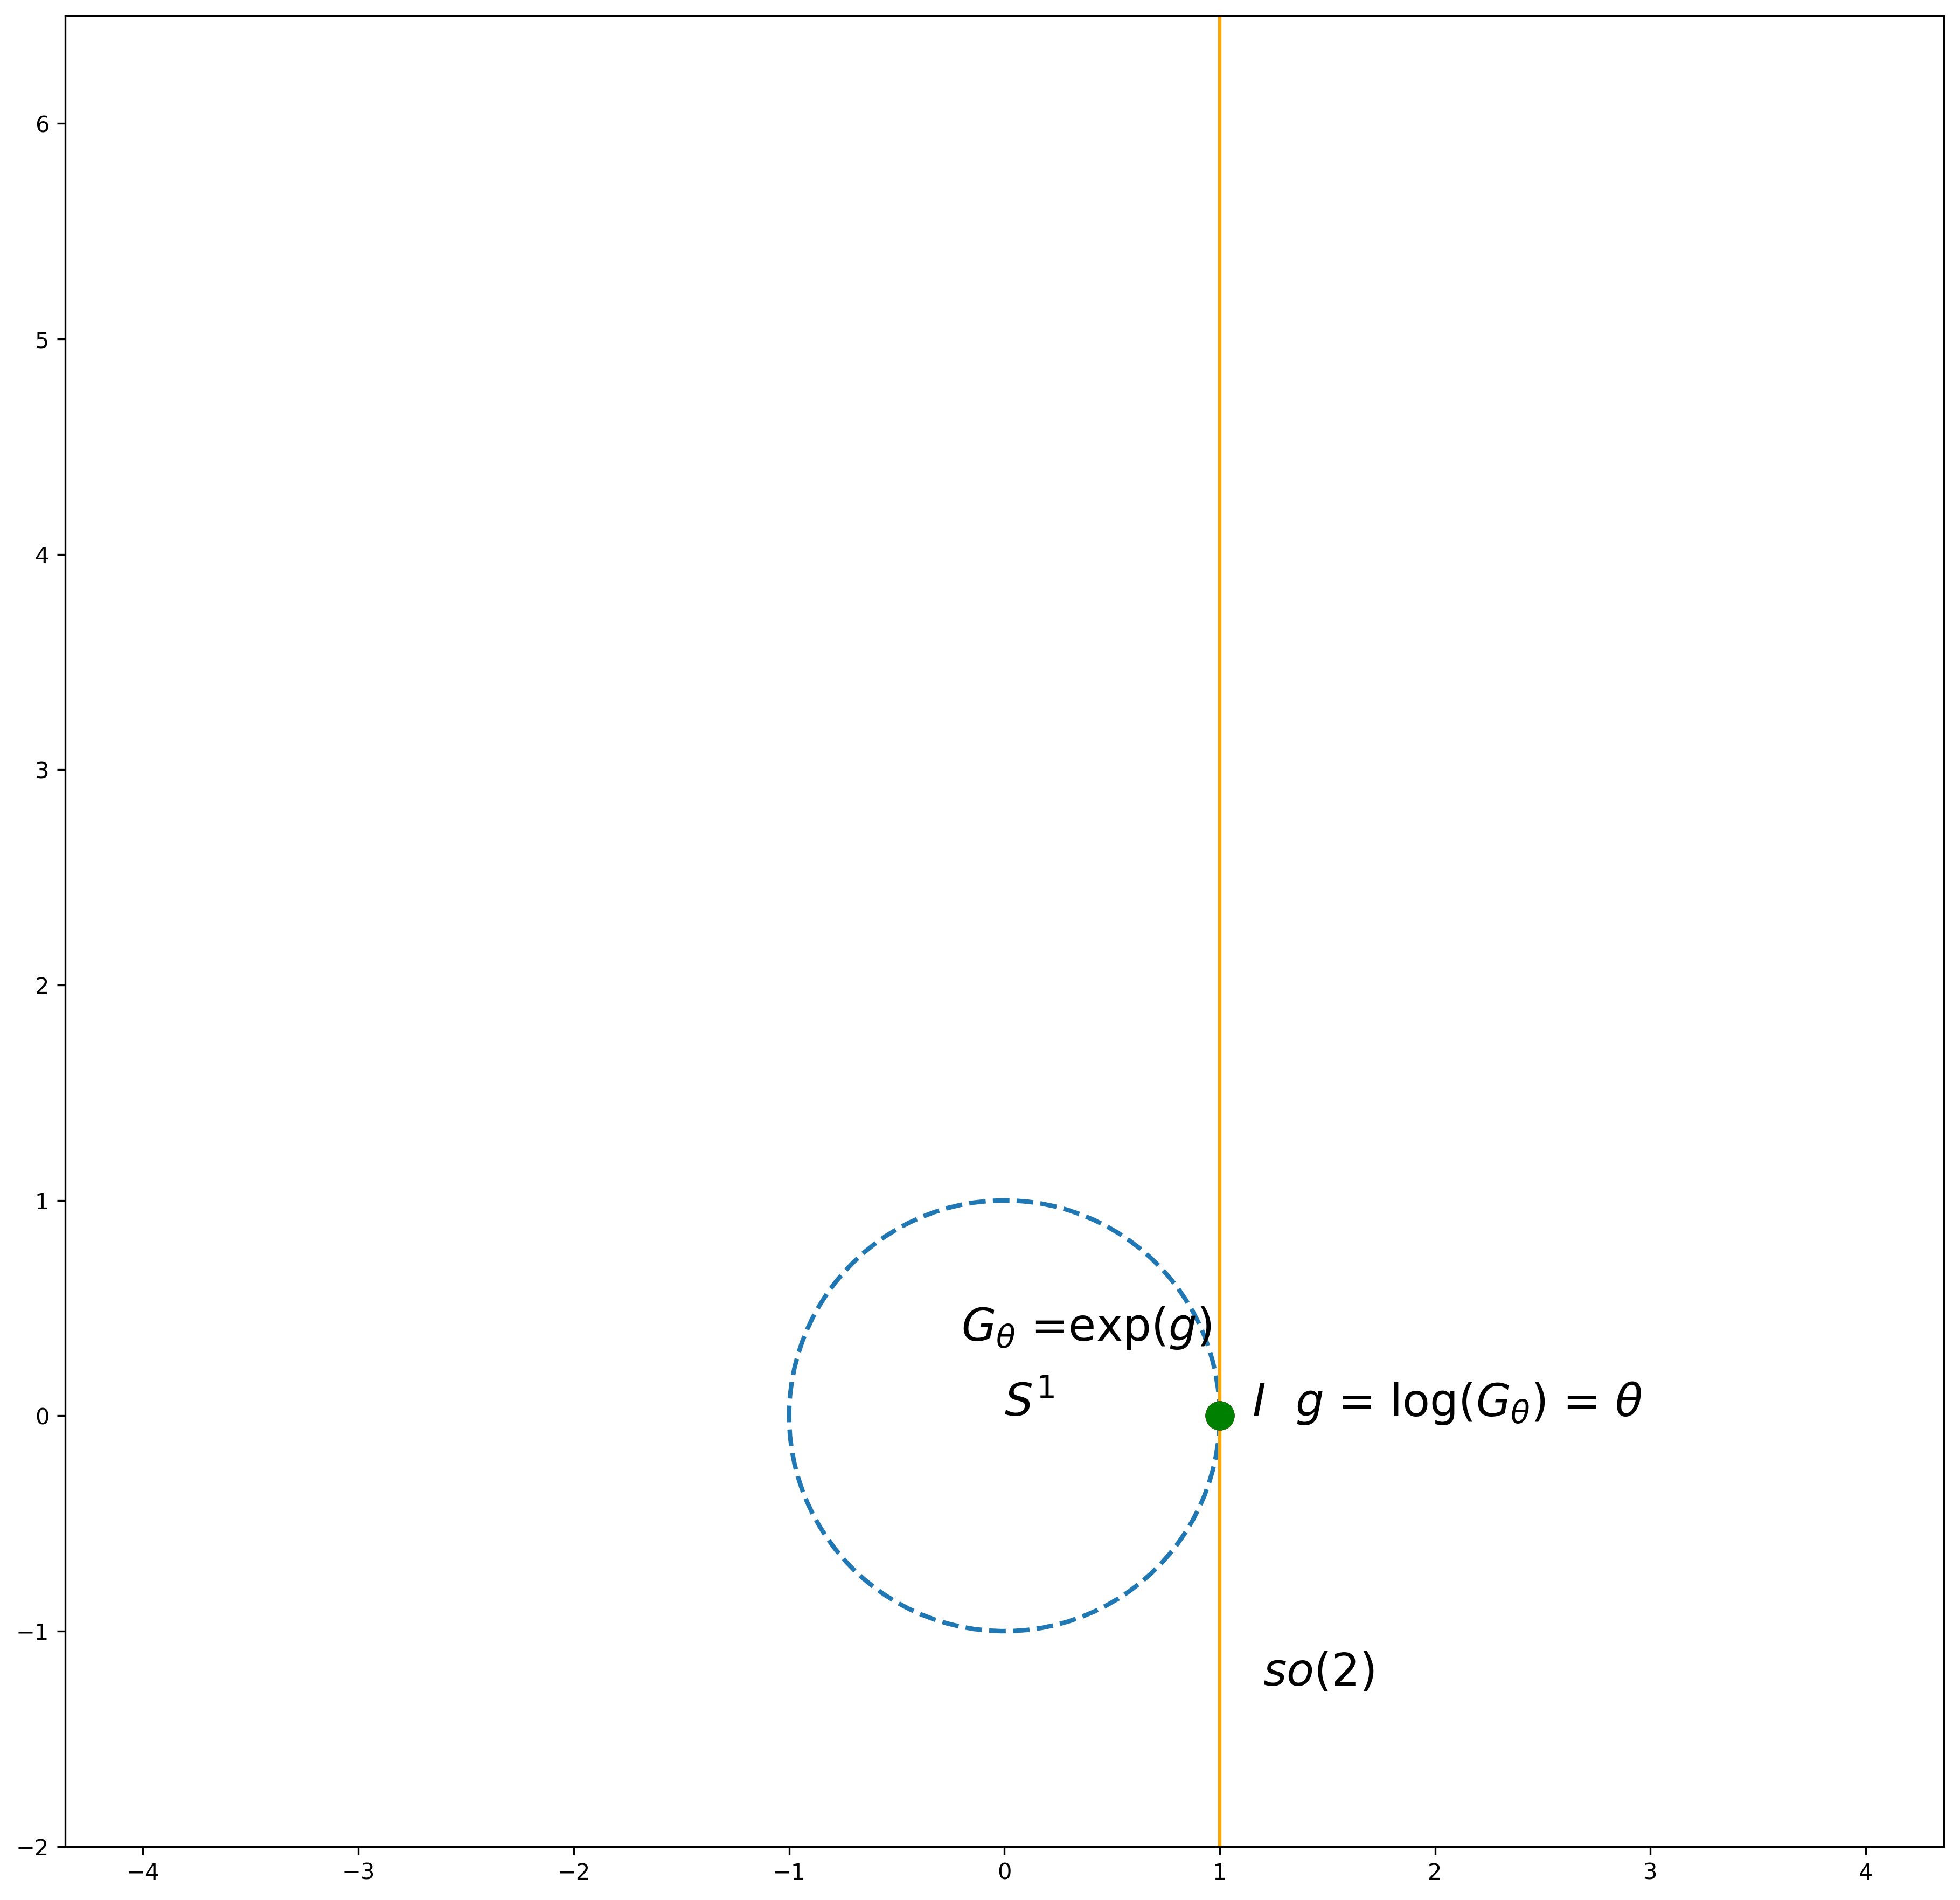

In [5]:
import string
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Label
from IPython.display import display
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

R = lie_group_SO2()
#Слайдер для задания угла тета. Возвращает вещественные числа
_lw = widgets.FloatSlider(
    min=0, # Минимальное значение
    max=360, # Максимальное значение
    step=0.1, # Шаг, с которым меняется значение при перемещении слайдера
    description='Угол $\u03b8$ :', # Метка
    value=0, # Значение по умолчанию
    continuous_update=False, #Дискретное изменение
    orientation='horizontal', # Ориентация слайдера
    readout=True # Демонстрировать текущее значение слайдера возле него?
)
#Интерактивное управление параметрами модели с помощью виджетов
@widgets.interact(lw = _lw)
def plot(lw=0):
    #размер окна
    plt.figure(figsize=(15, 15))
    
    #изображаем множество точек, принадлежащих S1
    theta = np.linspace(0, 2*np.pi, 100)
    plt.plot(np.cos(theta), np.sin(theta), linestyle='dashed', linewidth=2)
    
    L=7 #длина изображаемого участка касательной и алгебры Ли
    th = lw*np.pi/180. #угол в радианах
    
    #Значение матрицы поворота для заданного угла
    G.get_from_degrees(lw)
    
    #Строим касательное пространство
    tangent_plane = np.column_stack((np.ones(100), np.linspace(-L, L, 100)))
    plt.plot(tangent_plane[:,0], tangent_plane[:,1], color='orange')
    
    # отображаем путь на алгебре so(2)
    so2_path = np.column_stack((np.ones(100), np.linspace(0, th, 100)))
    plt.plot(so2_path[:,0], so2_path[:,1], color='green', linewidth=4)
    
    #Добавляем легенду и задаём оси графика
    plt.text(1.15, 0, '$I$', fontsize=20)
    plt.text(0., 0., '$S^{1}$', fontsize=20)
    plt.text(1.2, -1.25, '$so(2)$', fontsize=20)
    plt.axis('equal')
    
    #plt.grid(True)
    plt.axis((-2, 2, -2, 6.5))
    
    #Путь, пройденный по S1 от единицы до элемента, соответствующего углу тета
    theta2 = np.linspace(0, th, 100)
    plt.plot(np.cos(theta2), np.sin(theta2), color='red', linewidth=4)
    
    #Точка в единице группы
    plt.plot(1, 0, color='blue', marker='o', linewidth=2, markersize=12)
    
    #Точка в текущем элементе группы
    plt.plot(np.cos(th), np.sin(th), color='red', marker='o', linewidth=2,markersize=12)
    
    #Точка на алгебре
    plt.plot(1, th, color='green', marker='o', linewidth=2, markersize=12)
    
    #Метки для точки и касательного пространства
    plt.text(np.cos(th)*1.1-1.3, np.sin(th)*1.4+0.35, '$G_\u03b8$ =exp($g$)', fontsize=20)
    plt.text(1+0.35, th, '$g$ = log($G_\u03b8$) = $\u03b8$', fontsize=20)

### добавьте второй слайдер и реализуйте отображение двух углов, задаваемых слайдерами, на алгебре Ли;

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Угол \\(θ\\) :', max=360.0)…

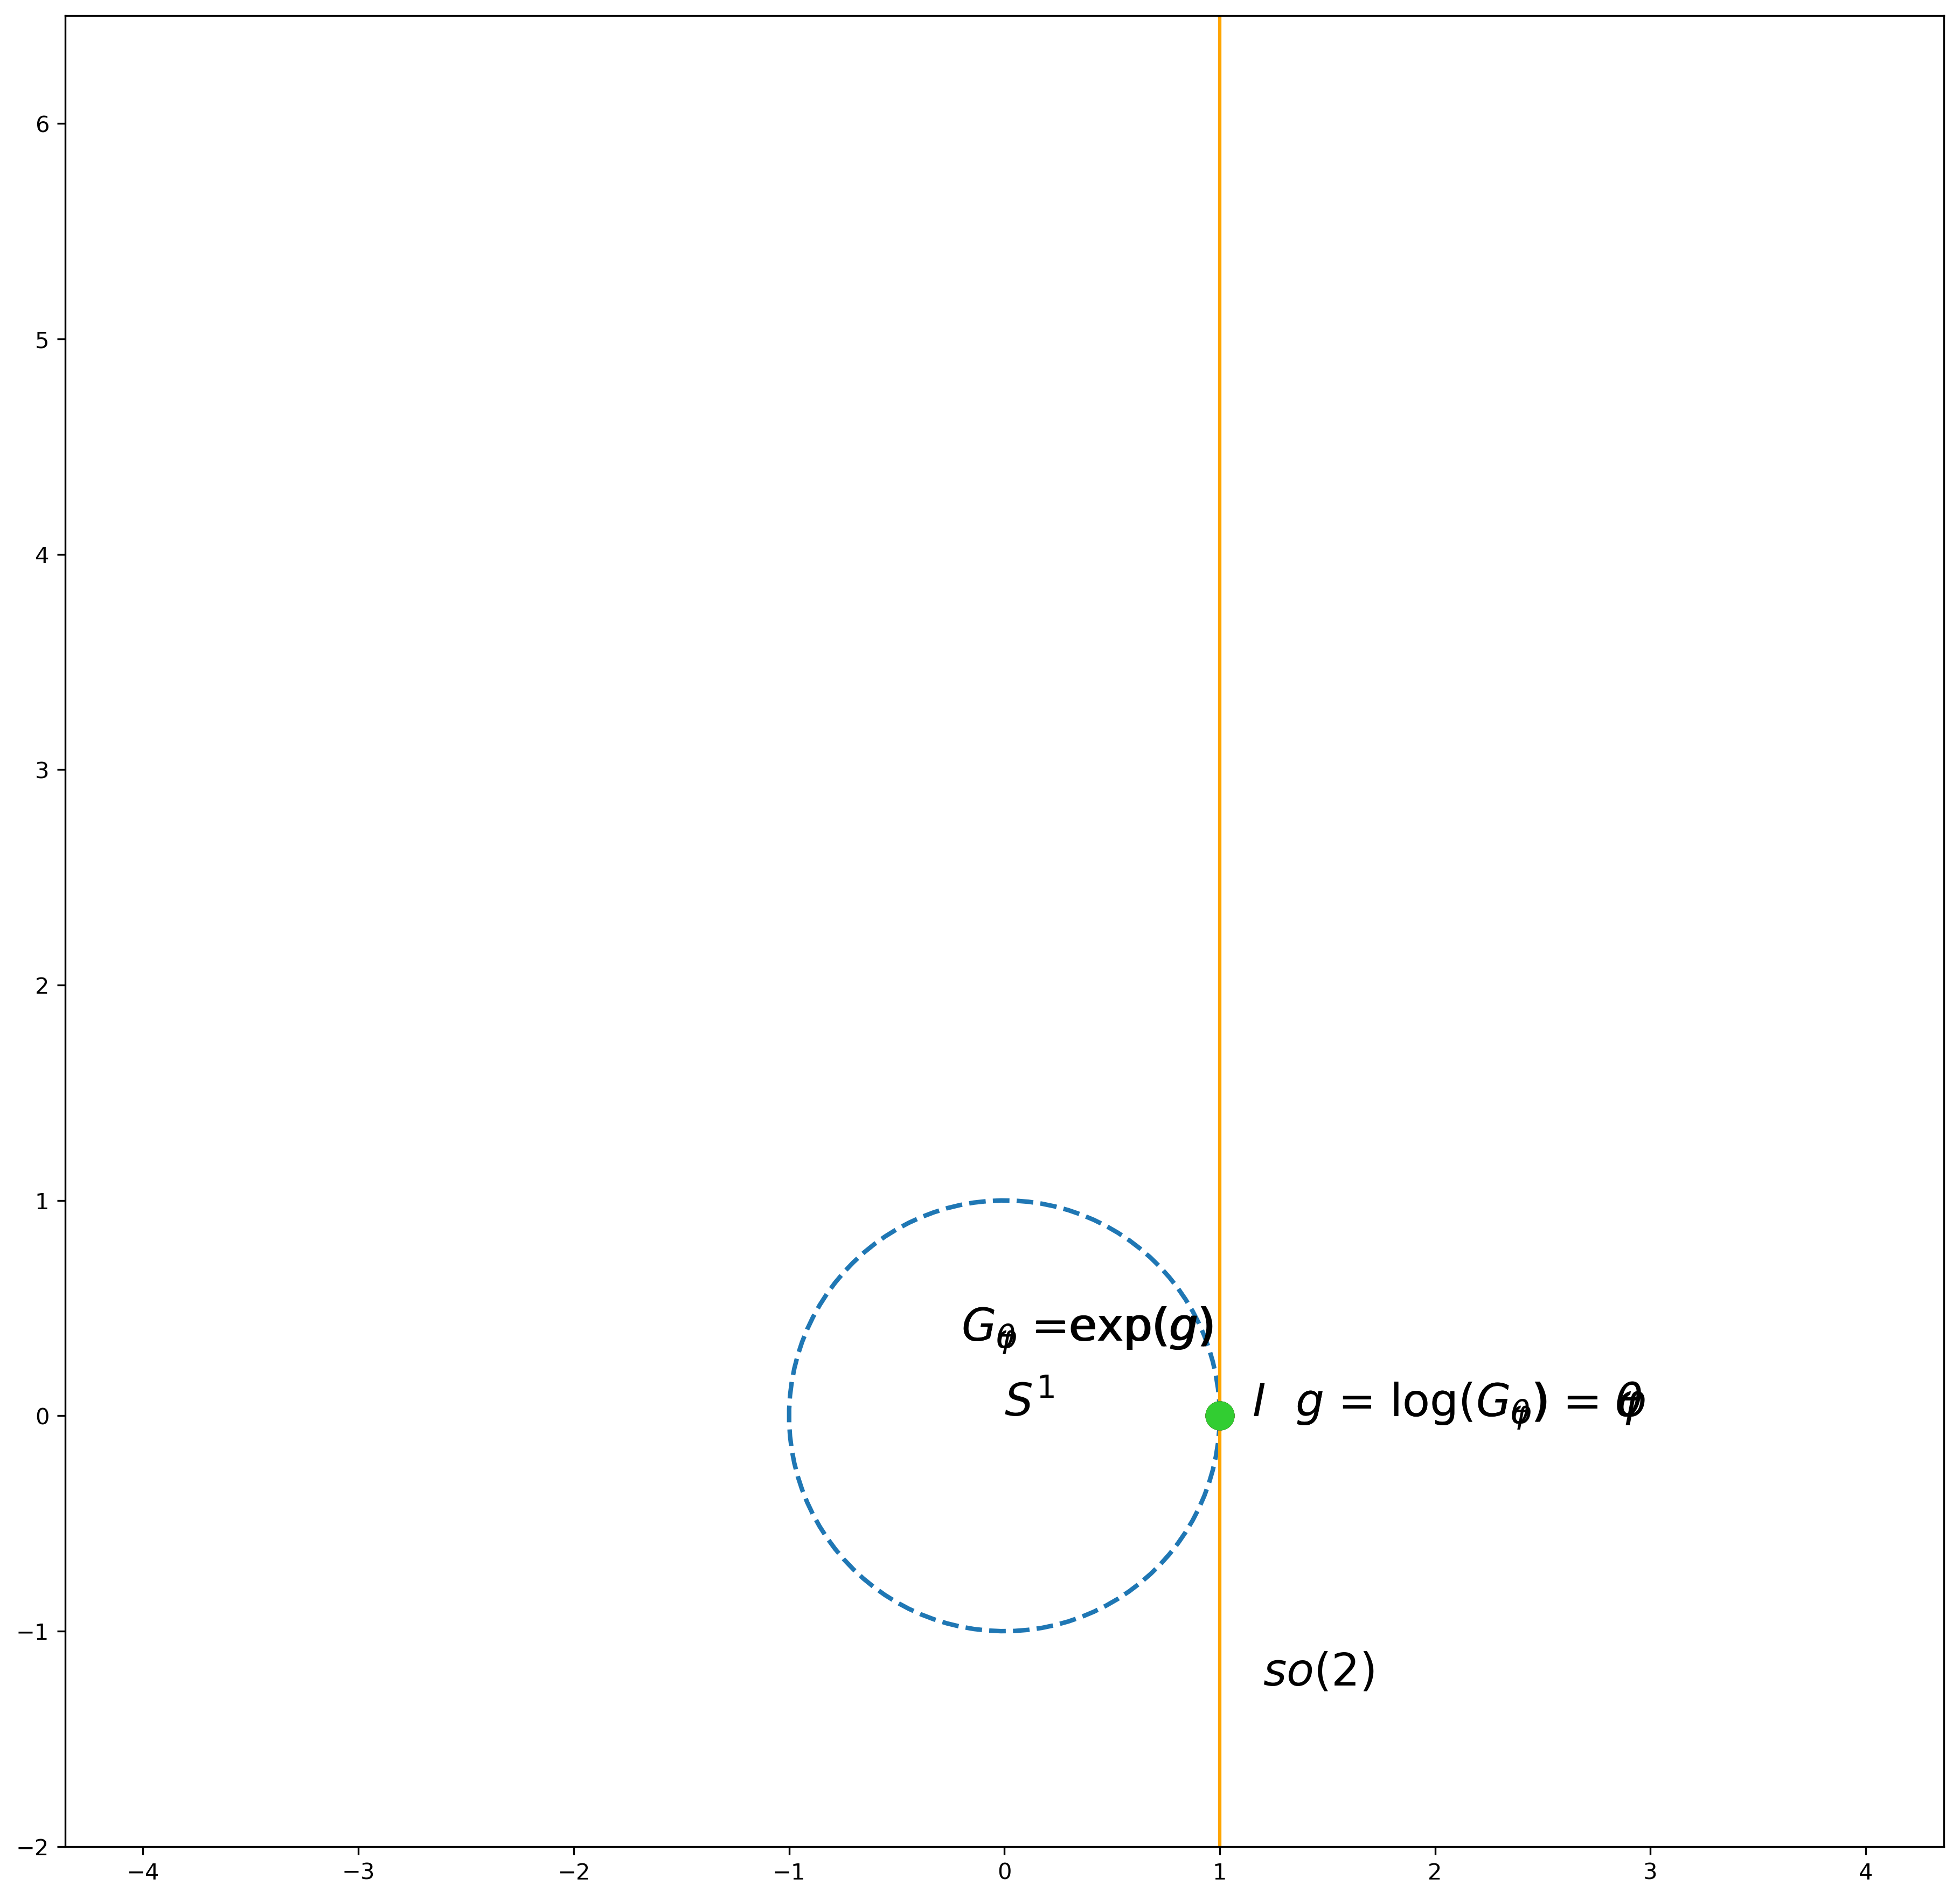

In [6]:
import string
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Label
from IPython.display import display
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

R = lie_group_SO2()
#Слайдер для задания угла тета. Возвращает вещественные числа
_theta = widgets.FloatSlider(
    min=0, # Минимальное значение
    max=360, # Максимальное значение
    step=0.1, # Шаг, с которым меняется значение при перемещении слайдера
    description='Угол \(\u03b8\) :', # Метка
    value=0, # Значение по умолчанию
    continuous_update=False, #Дискретное изменение
    orientation='horizontal', # Ориентация слайдера
    readout=True # Демонстрировать текущее значение слайдера возле него?
)
_phi = widgets.FloatSlider(
    min=0, # Минимальное значение
    max=360, # Максимальное значение
    step=0.1, # Шаг, с которым меняется значение при перемещении слайдера
    description='Угол \(\u03C6\) :', # Метка
    value=0, # Значение по умолчанию
    continuous_update=False, #Дискретное изменение
    orientation='horizontal', # Ориентация слайдера
    readout=True # Демонстрировать текущее значение слайдера возле него?
)

#Интерактивное управление параметрами модели с помощью виджетов
@widgets.interact(phi_var = _phi, theta_var = _theta)
def plot(theta_var=0,phi_var=0):
    #размер окна
    plt.figure(figsize=(15, 15))
    #изображаем множество точек, принадлежащих S1
    theta = np.linspace(0, 2*np.pi, 100)
    plt.plot(np.cos(theta), np.sin(theta), linestyle='dashed', linewidth=2)
    
    L=7 #длина изображаемого участка касательной и алгебры Ли
    th = theta_var*np.pi/180. #угол в радианах
    ph = phi_var*np.pi/180. #угол в радианах
    
    #Значение матрицы поворота для заданного угла
    G.get_from_degrees(theta_var)
    G.get_from_degrees(phi_var)
    
    #Строим касательное пространство
    tangent_plane = np.column_stack((np.ones(100), np.linspace(-L, L, 100)))
    plt.plot(tangent_plane[:,0], tangent_plane[:,1], color='orange')
    
    # отображаем путь на алгебре so(2)
    so2_path_theta = np.column_stack((np.ones(100), np.linspace(0, th, 100)))
    so2_path_phi = np.column_stack((np.ones(100), np.linspace(0, ph, 100)))
    plt.plot(so2_path_theta[:,0], so2_path_theta[:,1], color='green', linewidth=4)
    plt.plot(so2_path_phi[:,0], so2_path_phi[:,1], color='limegreen', linewidth=4)
    
    #Добавляем легенду и задаём оси графика
    plt.text(1.15, 0, '$I$', fontsize=20)
    plt.text(0., 0., '$S^{1}$', fontsize=20)
    plt.text(1.2, -1.25, '$so(2)$', fontsize=20)
    plt.axis('equal')
    
    #plt.grid(True)
    plt.axis((-2, 2, -2, 6.5))
    
    #Путь, пройденный по S1 от единицы до элемента, соответствующего углу тета
    theta2 = np.linspace(0, th, 100)
    phi2 = np.linspace(0, ph, 100)
    plt.plot(np.cos(theta2), np.sin(theta2), color='red', linewidth=4)
    plt.plot(np.cos(phi2), np.sin(phi2), color='lightcoral', linewidth=4)
    
    #Точка в единице группы
    plt.plot(1, 0, color='blue', marker='o', linewidth=2, markersize=12)
    
    #Точка в текущем элементе группы
    plt.plot(np.cos(th), np.sin(th), color='red', marker='o', linewidth=2,markersize=12)
    plt.plot(np.cos(ph), np.sin(ph), color='lightcoral', marker='o', linewidth=2,markersize=12)
    
    #Точка на алгебре
    plt.plot(1, th, color='green', marker='o', linewidth=2, markersize=12)
    plt.plot(1, ph, color='limegreen', marker='o', linewidth=2, markersize=12)
    
    #Метки для точки и касательного пространства
    plt.text(np.cos(th)*1.1-1.3, np.sin(th)*1.4+0.35, '$G_\u03b8$ =exp($g$)', fontsize=20)
    plt.text(np.cos(ph)*1.1-1.3, np.sin(ph)*1.4+0.35, '$G_\u03C6$ =exp($g$)', fontsize=20)
    plt.text(1+0.35, th, '$g$ = log($G_\u03b8$) = $\u03b8$', fontsize=20)
    plt.text(1+0.35, ph, '$g$ = log($G_\u03C6$) = $\u03C6$', fontsize=20)

### реализуйте отображение на группу угла, являющегося суммой двух заданных углов

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Угол \\(θ\\) :', max=360.0)…

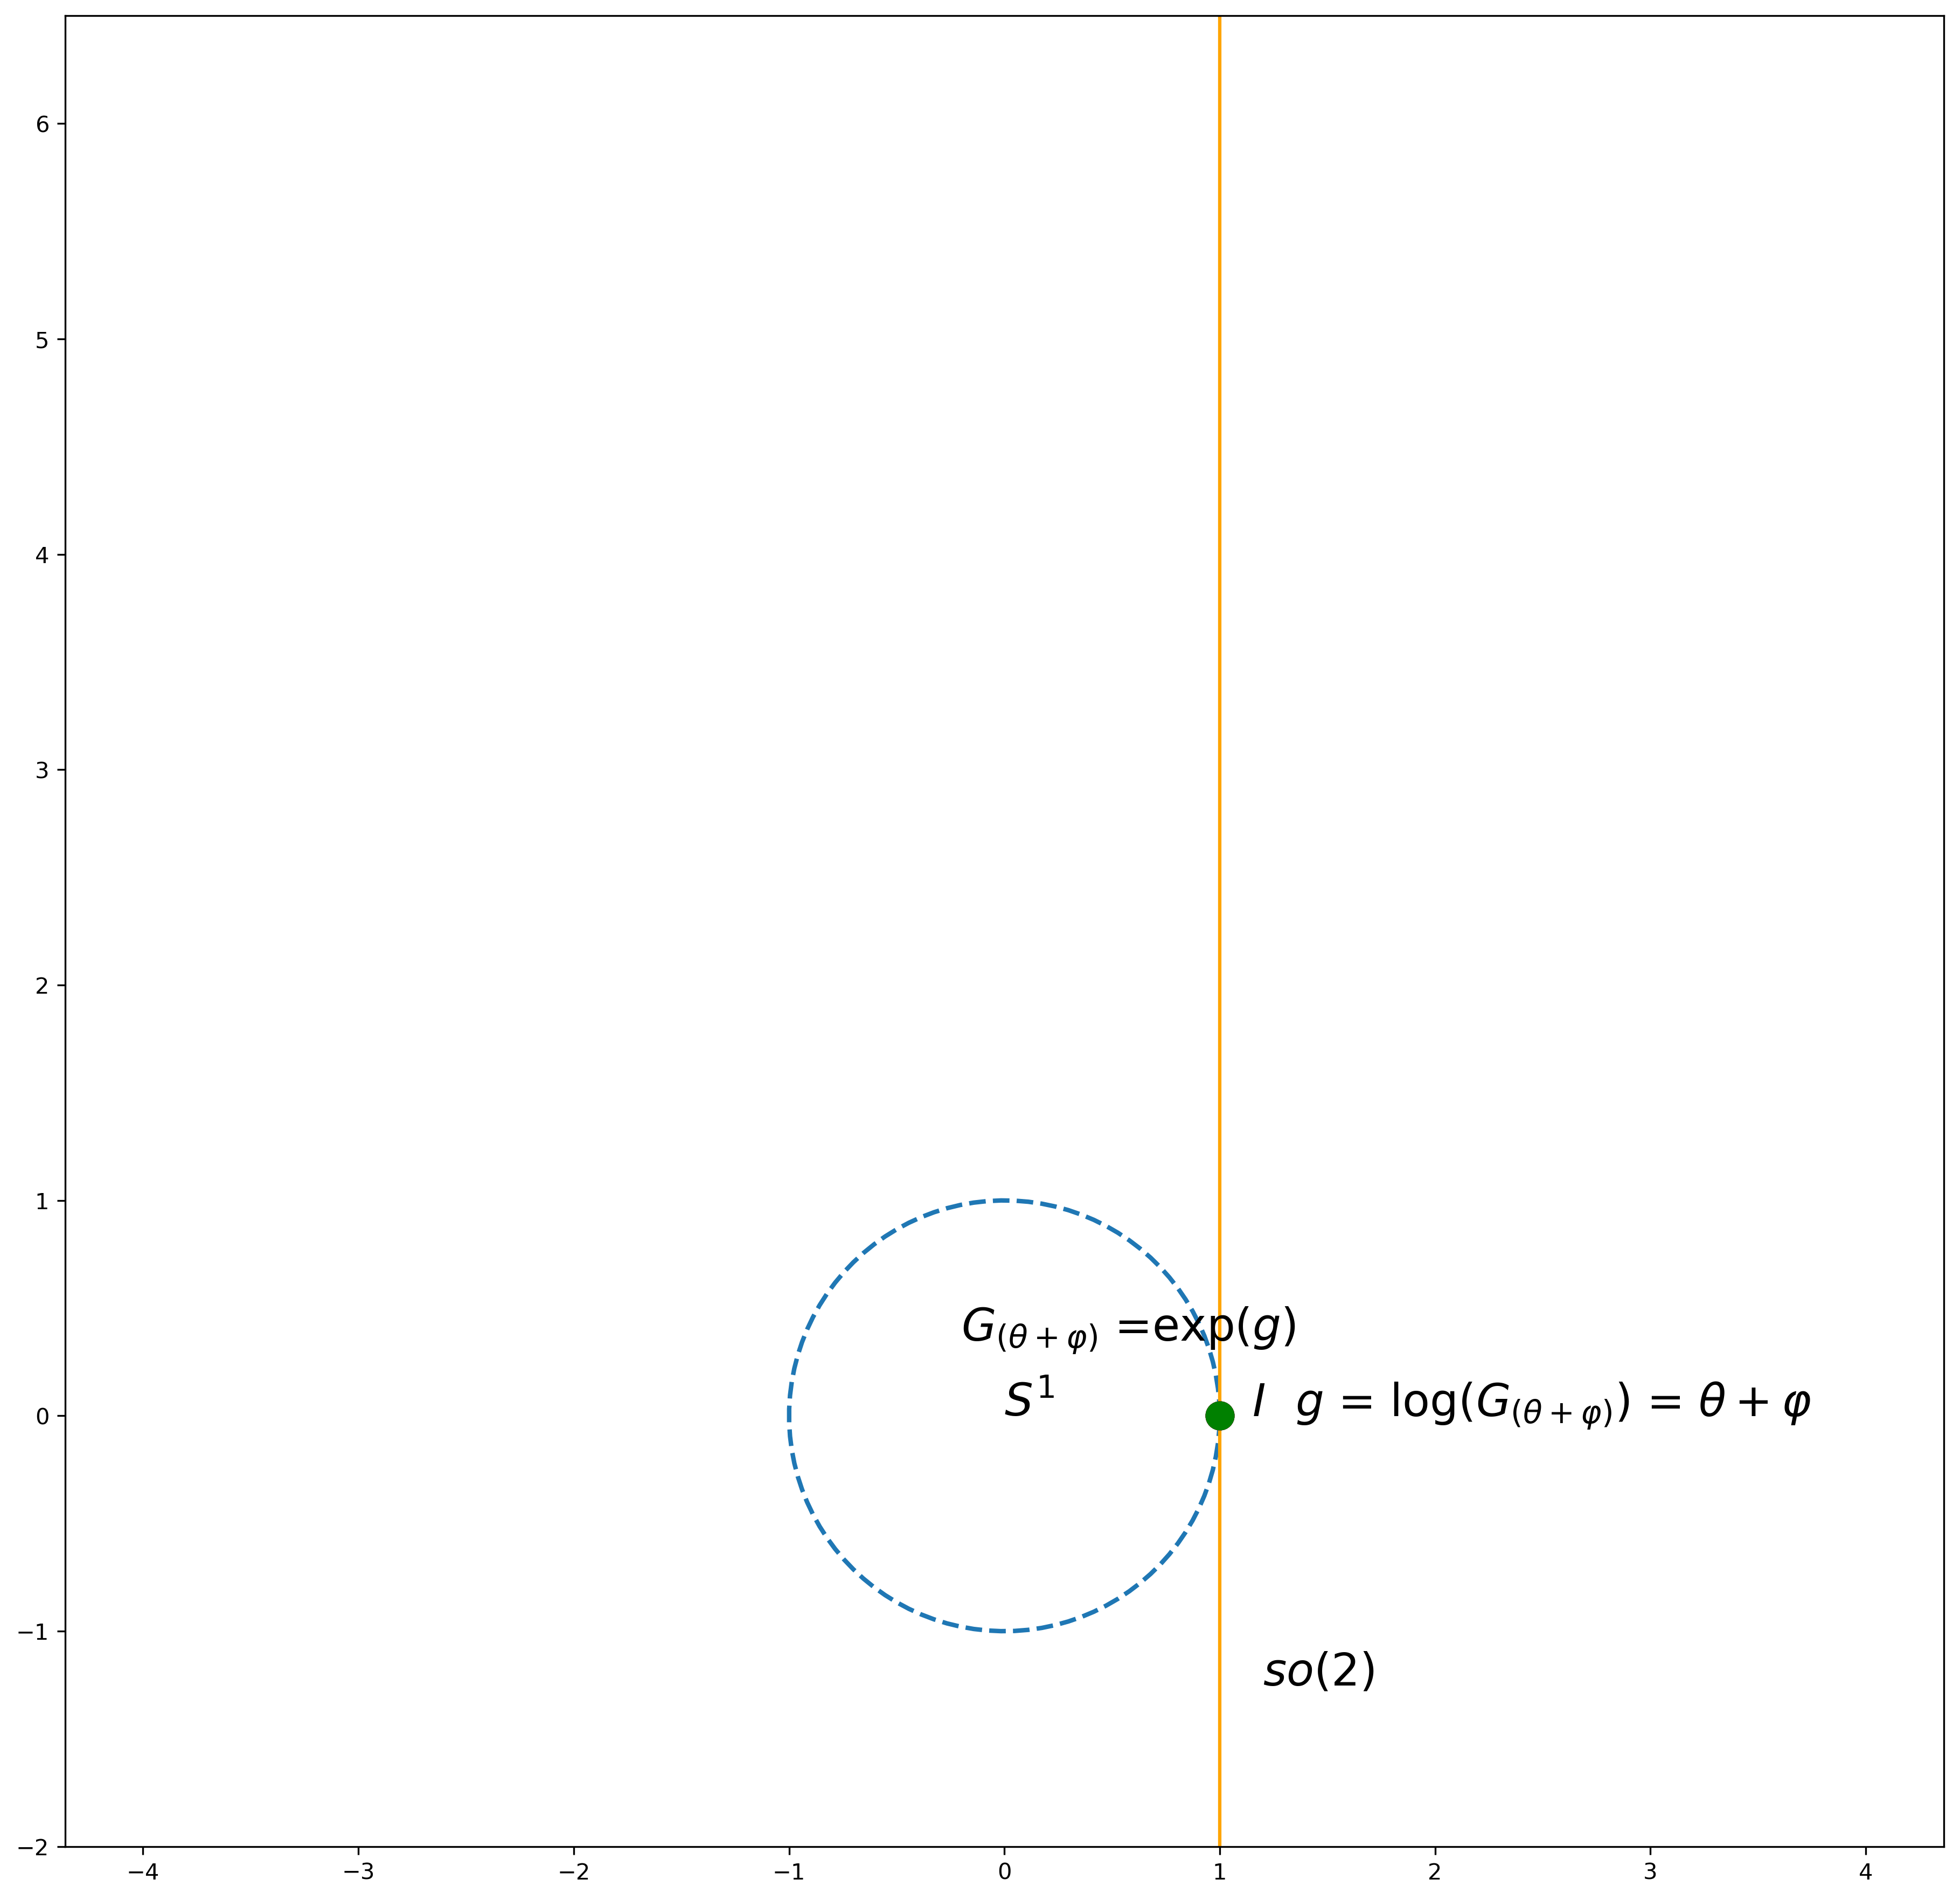

In [7]:
import string
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Label
from IPython.display import display
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

R = lie_group_SO2()
#Слайдер для задания угла тета. Возвращает вещественные числа
_theta = widgets.FloatSlider(
    min=0, # Минимальное значение
    max=360, # Максимальное значение
    step=0.1, # Шаг, с которым меняется значение при перемещении слайдера
    description='Угол \(\u03b8\) :', # Метка
    value=0, # Значение по умолчанию
    continuous_update=False, #Дискретное изменение
    orientation='horizontal', # Ориентация слайдера
    readout=True # Демонстрировать текущее значение слайдера возле него?
)
_phi = widgets.FloatSlider(
    min=0, # Минимальное значение
    max=360, # Максимальное значение
    step=0.1, # Шаг, с которым меняется значение при перемещении слайдера
    description='Угол \(\u03C6\) :', # Метка
    value=0, # Значение по умолчанию
    continuous_update=False, #Дискретное изменение
    orientation='horizontal', # Ориентация слайдера
    readout=True # Демонстрировать текущее значение слайдера возле него?
)
#Интерактивное управление параметрами модели с помощью виджетов

@widgets.interact(phi_var = _phi, theta_var = _theta)
def plot(theta_var=0,phi_var=0):
    theta_var=theta_var+phi_var
    #размер окна
    plt.figure(figsize=(15, 15))
    #изображаем множество точек, принадлежащих S1
    theta = np.linspace(0, 2*np.pi, 100)
    plt.plot(np.cos(theta), np.sin(theta), linestyle='dashed', linewidth=2)
    
    L=7 #длина изображаемого участка касательной и алгебры Ли
    th = theta_var*np.pi/180. #угол в радианах
    
    #Значение матрицы поворота для заданного угла
    G.get_from_degrees(theta_var)
    
    #Строим касательное пространство
    tangent_plane = np.column_stack((np.ones(100), np.linspace(-L, L, 100)))
    plt.plot(tangent_plane[:,0], tangent_plane[:,1], color='orange')
    
    # отображаем путь на алгебре so(2)
    so2_path = np.column_stack((np.ones(100), np.linspace(0, th, 100)))
    plt.plot(so2_path[:,0], so2_path[:,1], color='green', linewidth=4)
    
    #Добавляем легенду и задаём оси графика
    plt.text(1.15, 0, '$I$', fontsize=20)
    plt.text(0., 0., '$S^{1}$', fontsize=20)
    plt.text(1.2, -1.25, '$so(2)$', fontsize=20)
    plt.axis('equal')
    
    #plt.grid(True)
    plt.axis((-2, 2, -2, 6.5))
    
    #Путь, пройденный по S1 от единицы до элемента, соответствующего углу тета
    theta2 = np.linspace(0, th, 100)
    plt.plot(np.cos(theta2), np.sin(theta2), color='red', linewidth=4)
    
    #Точка в единице группы
    plt.plot(1, 0, color='blue', marker='o', linewidth=2, markersize=12)
    
    #Точка в текущем элементе группы
    plt.plot(np.cos(th), np.sin(th), color='red', marker='o', linewidth=2,markersize=12)
    
    #Точка на алгебре
    plt.plot(1, th, color='green', marker='o', linewidth=2, markersize=12)
    
    #Метки для точки и касательного пространства
    plt.text(np.cos(th)*1.1-1.3, np.sin(th)*1.4+0.35, '$G_{(\u03b8+\u03C6)}$ =exp($g$)', fontsize=20)
    plt.text(1+0.35, th, '$g$ = log($G_{(\u03b8+\u03C6)}$) = $\u03b8+\u03C6$', fontsize=20)

### реализуйте отображение на группу угла, являющегося средним арифметическим двух заданных углов

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Угол \\(θ\\) :', max=360.0)…

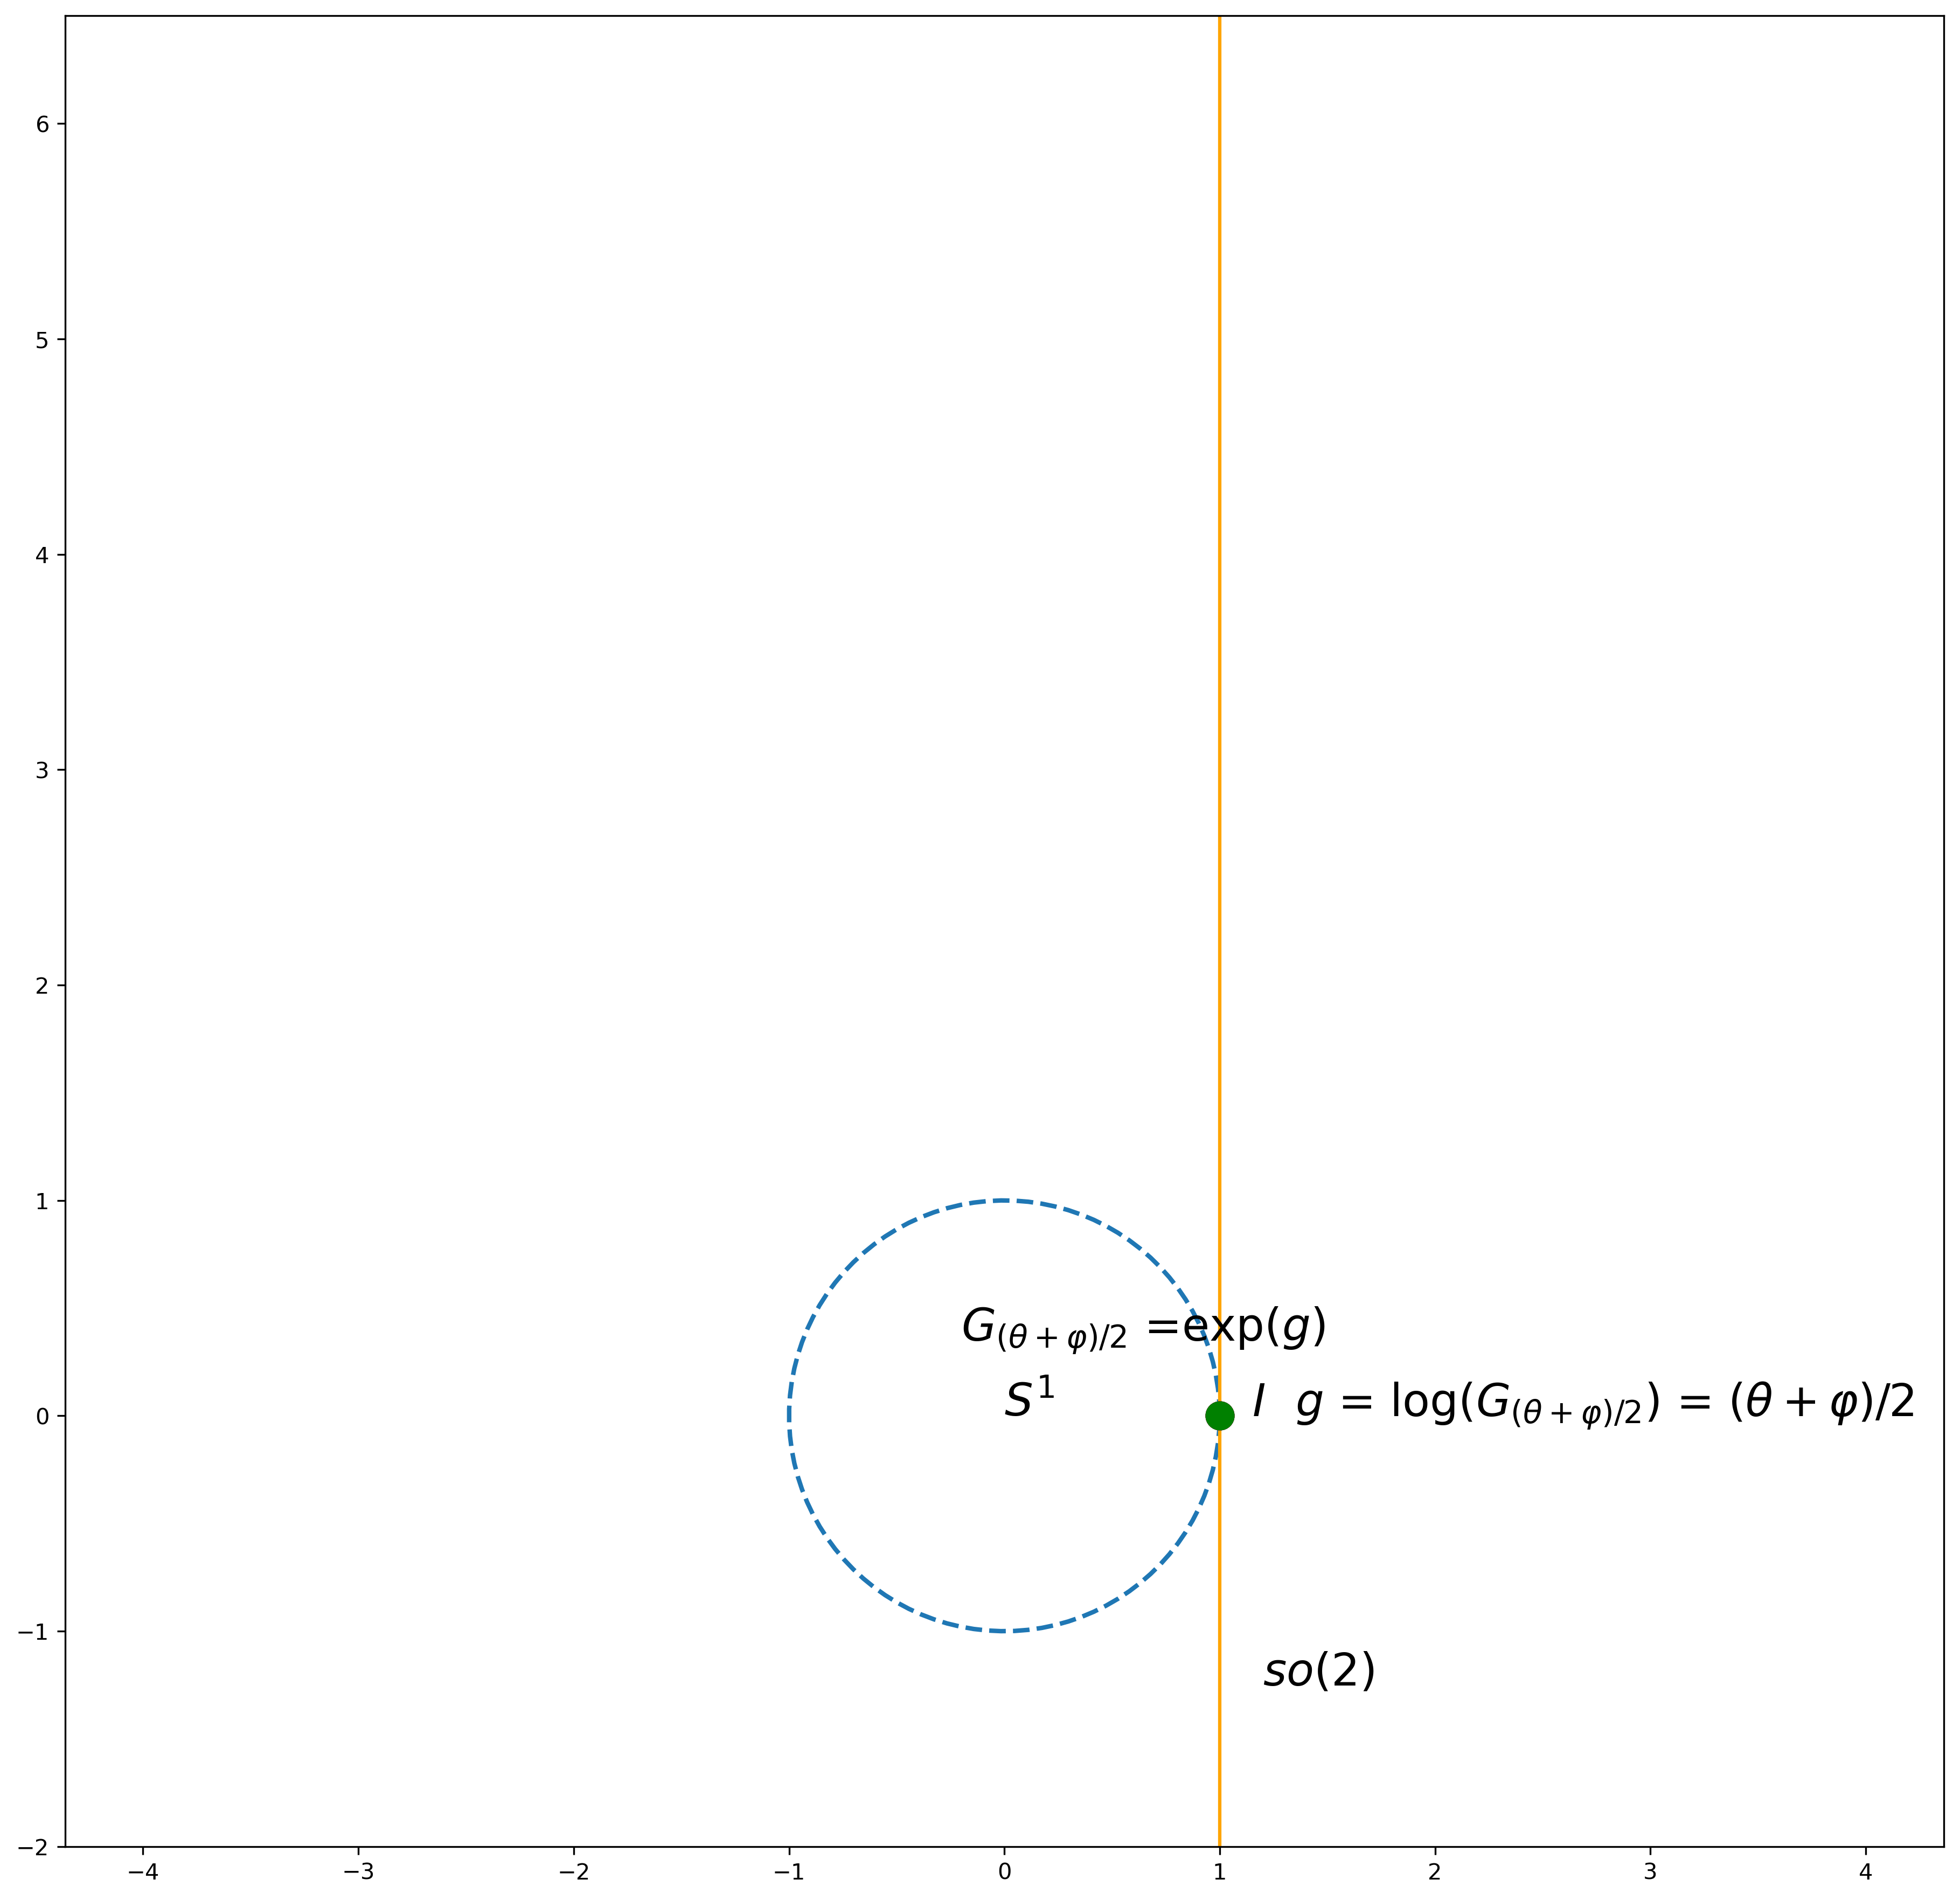

In [9]:
import string
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Label
from IPython.display import display
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

R = lie_group_SO2()
#Слайдер для задания угла тета. Возвращает вещественные числа
_theta = widgets.FloatSlider(
    min=0, # Минимальное значение
    max=360, # Максимальное значение
    step=0.1, # Шаг, с которым меняется значение при перемещении слайдера
    description='Угол \(\u03b8\) :', # Метка
    value=0, # Значение по умолчанию
    continuous_update=False, #Дискретное изменение
    orientation='horizontal', # Ориентация слайдера
    readout=True # Демонстрировать текущее значение слайдера возле него?
)
_phi = widgets.FloatSlider(
    min=0, # Минимальное значение
    max=360, # Максимальное значение
    step=0.1, # Шаг, с которым меняется значение при перемещении слайдера
    description='Угол \(\u03C6\) :', # Метка
    value=0, # Значение по умолчанию
    continuous_update=False, #Дискретное изменение
    orientation='horizontal', # Ориентация слайдера
    readout=True # Демонстрировать текущее значение слайдера возле него?
)
#Интерактивное управление параметрами модели с помощью виджетов

@widgets.interact(phi_var = _phi, theta_var = _theta)
def plot(theta_var=0,phi_var=0):
    theta_var=(theta_var+phi_var)/2
    #размер окна
    plt.figure(figsize=(15, 15))
    #изображаем множество точек, принадлежащих S1
    theta = np.linspace(0, 2*np.pi, 100)
    plt.plot(np.cos(theta), np.sin(theta), linestyle='dashed', linewidth=2)
    
    L=7 #длина изображаемого участка касательной и алгебры Ли
    th = theta_var*np.pi/180. #угол в радианах
    
    #Значение матрицы поворота для заданного угла
    G.get_from_degrees(theta_var)
    
    #Строим касательное пространство
    tangent_plane = np.column_stack((np.ones(100), np.linspace(-L, L, 100)))
    plt.plot(tangent_plane[:,0], tangent_plane[:,1], color='orange')
    
    # отображаем путь на алгебре so(2)
    so2_path = np.column_stack((np.ones(100), np.linspace(0, th, 100)))
    plt.plot(so2_path[:,0], so2_path[:,1], color='green', linewidth=4)
    
    #Добавляем легенду и задаём оси графика
    plt.text(1.15, 0, '$I$', fontsize=20)
    plt.text(0., 0., '$S^{1}$', fontsize=20)
    plt.text(1.2, -1.25, '$so(2)$', fontsize=20)
    plt.axis('equal')
    
    #plt.grid(True)
    plt.axis((-2, 2, -2, 6.5))
    
    #Путь, пройденный по S1 от единицы до элемента, соответствующего углу тета
    theta2 = np.linspace(0, th, 100)
    plt.plot(np.cos(theta2), np.sin(theta2), color='red', linewidth=4)
    
    #Точка в единице группы
    plt.plot(1, 0, color='blue', marker='o', linewidth=2, markersize=12)
    
    #Точка в текущем элементе группы
    plt.plot(np.cos(th), np.sin(th), color='red', marker='o', linewidth=2,markersize=12)
    
    #Точка на алгебре
    plt.plot(1, th, color='green', marker='o', linewidth=2, markersize=12)
    
    #Метки для точки и касательного пространства
    plt.text(np.cos(th)*1.1-1.3, np.sin(th)*1.4+0.35, '$G_{(\u03b8+\u03C6)/2}$ =exp($g$)', fontsize=20)
    plt.text(1+0.35, th, '$g$ = log($G_{(\u03b8+\u03C6)/2}$) = $(\u03b8+\u03C6)/2$', fontsize=20)

### реализуйте отображение на группу траектории, соединяющей (интерполирующей) два заданных угла

## Кинематика движения

Состояние твердого тела в пространстве можно определить с помощью подвижной(связанной с квадракоптером) и неподвижной(связанной с Землей) системой координат.
$$ Oxyz - неподвижная система координат $$ 
$$ O'x'y'z' - Подвижная система координат $$
$$ O'xyz - Промежуточная система координат $$
В промежуточной системе координат центр совмещен с цетром подвижной системы(центром масс твердого тела), а оси направленны в неподвижной системе координат. Переход от промежуточной системы к подвижной можно выполнять с помощью поворотов:
* Вокруг оси \\( z\\) на угол \\( \psi \\) против часовой стрелке(\\( \psi \\) - угол рыскания(вращения))
* Вокруг нового положения \\( y_1 \\) оси \\( y \\) на угол \\( \vartheta \\) по часовой стрелке(\\( \vartheta \\) - угол тангажа(угловое движение относительно горизонтальной оси движения))
* Вокруг нового положения \\( x_1 \\) оси \\( x \\) на угол \\( \gamma \\) против часовой стрелке(\\( \gamma \\) - угол крена(наклон набок))
![Преобразование неподвижной системы координат в подвижную](./Capture.PNG)
Кинематические уравнения в углах \\( \psi,  \vartheta, \gamma\\):
$$
\left(\begin{array}{cc} 
\dot\psi\\
\dot\vartheta\\
\dot\gamma
\end{array}\right)
=
\left(\begin{array}{cc} 
0 & \frac{sin\gamma}{cos\vartheta} & \frac{cos\gamma}{cos\vartheta}\\ 
0 & -cos\gamma & sin\gamma\\ 
1 & -sin\gamma \cdot tg\vartheta & -cos\gamma \cdot tg\vartheta
\end{array}\right)
\omega
$$